# Liberaries and Data Import

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, integrate

In [3]:
from IPython.display import Image, HTML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [4]:
from wordcloud import WordCloud, STOPWORDS

In [5]:
pwd

'C:\\Users\\Shaishav\\Downloads'

In [6]:
books = pd.read_csv('BX-Books.csv', sep='\;', error_bad_lines=False, encoding="latin-1")

users = pd.read_csv('BX-Users.csv', sep='\;', error_bad_lines=False, encoding="latin-1")

ratings = pd.read_csv('BX-Book-Ratings.csv', sep='\;', error_bad_lines=False, encoding="latin-1")

<ipython-input-6-56850809cc4f>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  books = pd.read_csv('BX-Books.csv', sep='\;', error_bad_lines=False, encoding="latin-1")
Skipping line 6: Expected 8 fields in line 6, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 23: Expected 8 fields in line 23, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 25: Expected 8 fields in line 25, saw 10. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 39: Expected 8 fields in line 39, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 85: Expected 8 fields in line 85, saw 9. Error 

Skipping line 100377: Expected 8 fields in line 100377, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 100379: Expected 8 fields in line 100379, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 100387: Expected 8 fields in line 100387, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 100388: Expected 8 fields in line 100388, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 100393: Expected 8 fields in line 100393, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 100437: Expected 8 fields in line 100437, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 100454: Expected 8 fields in line 100454, saw 9. Error could possibly be d

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Skipping line 263607: Expected 8 fields in line 263607, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 263613: Expected 8 fields in line 263613, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 263620: Expected 8 fields in line 263620, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 263632: Expected 8 fields in line 263632, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 263636: Expected 8 fields in line 263636, saw 9. E

<ipython-input-6-56850809cc4f>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv('BX-Users.csv', sep='\;', error_bad_lines=False, encoding="latin-1")
Skipping line 5263: Expected 3 fields in line 5263, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 8197: Expected 3 fields in line 8197, saw 4. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 9312: Expected 3 fields in line 9312, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 10663: Expected 3 fields in line 10663, saw 5. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.
Skipping line 12347: Expected 3 fields in 

## Data Exploration

In [7]:
books.head(2)

,"""ISBN""","""Book-Title""","""Book-Author""","""Year-Of-Publication""","""Publisher""","""Image-URL-S""","""Image-URL-M""","""Image-URL-L"""
0,"""0195153448""","""Classical Mythology""","""Mark P. O. Morford""","""2002""","""Oxford University Press""","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448...."
1,"""0002005018""","""Clara Callan""","""Richard Bruce Wright""","""2001""","""HarperFlamingo Canada""","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018...."


In [8]:
users.head(2)

,"""User-ID""","""Location""","""Age"""
0,"""1""","""nyc, new york, usa""",NaN
1,"""2""","""stockton, california, usa""","""18"""


In [9]:
ratings.head()

,"""User-ID""","""ISBN""","""Book-Rating"""
0,"""276725""","""034545104X""","""0"""
1,"""276726""","""0155061224""","""5"""
2,"""276727""","""0446520802""","""0"""
3,"""276729""","""052165615X""","""3"""
4,"""276729""","""0521795028""","""6"""


### Renaming the columns and Getting rid of unnecessary columns

In [10]:
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users.columns = ['userID', 'Location', 'Age']

ratings.columns = ['userID', 'ISBN', 'bookRating']

In [11]:
ratings.rename(columns={'""Book-Rating""",,': 'bookRating', '""ISBN""': 'ISBN', '"User-ID':'User_ID'}, inplace=True)

In [12]:
ratings['bookRating'] = ratings['bookRating'].str.translate(str.maketrans({'"':'', ',':''}))
ratings['ISBN'] = ratings['ISBN'].str.translate(str.maketrans({'"':''}))
ratings['userID'] = ratings['userID'].str.translate(str.maketrans({'"':''}))

In [13]:
books.rename(columns={'ï»¿"ISBN': 'ISBN', '""Book-Title""': 'bookTitle', '""Book-Author""':'bookAuthor', '""Year-Of-Publication""':'yearOfPublication', '""Publisher""':'publisher', '""Image-URL-S""':'imageUrlS', '""Image-URL-M""':'imageUrlM', '""Image-URL-L""",,,,,,,,,,,,,,,,,,,,,':'imageUrlL',}, inplace=True)

In [14]:
books['ISBN'] = books['ISBN'].str.translate(str.maketrans({'"':''}))
books['bookTitle'] = books['bookTitle'].str.translate(str.maketrans({'"':''}))
books['bookAuthor'] = books['bookAuthor'].str.translate(str.maketrans({'"':''}))
books['yearOfPublication'] = books['yearOfPublication'].str.translate(str.maketrans({'"':''}))
books['publisher'] = books['publisher'].str.translate(str.maketrans({'"':''}))
books['imageUrlS'] = books['imageUrlS'].str.translate(str.maketrans({'"':''}))
books['imageUrlM'] = books['imageUrlM'].str.translate(str.maketrans({'"':''}))
books['imageUrlL'] = books['imageUrlL'].str.translate(str.maketrans({'"':''}))

In [15]:
users.rename(columns={'"User-ID': 'userID', '""Location""': 'Location', '""Age""",,,,,,,,':'Age'}, inplace=True)

In [16]:
users['Age'] = users['Age'].str.translate(str.maketrans({'"':'', ',':''}))
users['Location'] = users['Location'].str.translate(str.maketrans({'"':''}))
users['userID'] = users['userID'].str.translate(str.maketrans({'"':''}))

In [17]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...


In [18]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",NaN


In [19]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [20]:
ratings.isnull().sum().sum()

0

In [21]:
print(books.shape)
print(list(books.columns))

(250012, 8)
['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


In [22]:
print(users.shape)
print(list(users.columns))

(278700, 3)
['userID', 'Location', 'Age']


In [23]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


## Data visualization

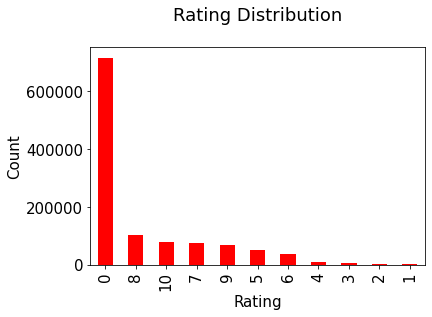

In [24]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=True).plot(kind='bar', color= 'r')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

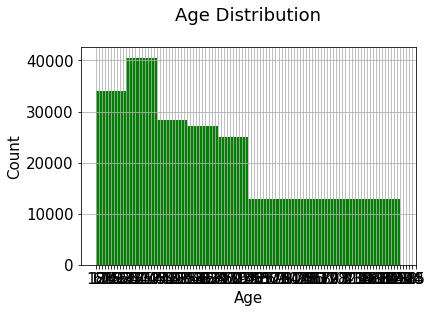

In [25]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100], color='g')
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [26]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [27]:
print(ratings.shape)

(527556, 3)


# Collaborative Filtering Using k-Nearest Neighbors

#### combine the rating data with the total rating count data, this gives what is needed to find out which books are popular and filter out lesser-known books.

In [28]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,003008685X,8,Pioneers
1,277427,0060002050,0,On a Wicked Dawn (Cynster Novels)
2,69697,0060002050,0,On a Wicked Dawn (Cynster Novels)
3,78783,0060002050,0,On a Wicked Dawn (Cynster Novels)
4,98391,0060002050,8,On a Wicked Dawn (Cynster Novels)


In [29]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']])

book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [30]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,003008685X,8,Pioneers,1
1,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),13
2,69697,0060002050,0,On a Wicked Dawn (Cynster Novels),13
3,78783,0060002050,0,On a Wicked Dawn (Cynster Novels),13
4,98391,0060002050,8,On a Wicked Dawn (Cynster Novels),13


In [31]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   148950.000
mean         3.118
std          7.581
min          1.000
25%          1.000
50%          1.000
75%          3.000
max        365.000
Name: totalRatingCount, dtype: float64


In [32]:
print(book_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

0.900    6.000
0.910    6.000
0.920    7.000
0.930    7.000
0.940    9.000
0.950   10.000
0.960   12.000
0.970   15.000
0.980   20.000
0.990   32.000
Name: totalRatingCount, dtype: float64


In [33]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
111,277427,0060930535,0,The Poisonwood Bible: A Novel,133
112,254,0060930535,0,The Poisonwood Bible: A Novel,133
113,6251,0060930535,0,The Poisonwood Bible: A Novel,133
114,7346,0060930535,0,The Poisonwood Bible: A Novel,133
115,11676,0060930535,0,The Poisonwood Bible: A Novel,133


In [34]:
rating_popular_book.shape

(60171, 5)

### Filter users in US and Canada to avoid "Memory Error"

In [35]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,0060930535,0,The Poisonwood Bible: A Novel,133,"gilbert, arizona, usa"
1,254,0060930535,0,The Poisonwood Bible: A Novel,133,"minneapolis, minnesota, usa"
2,6251,0060930535,0,The Poisonwood Bible: A Novel,133,"wahiawa, hawaii, usa"
3,7346,0060930535,0,The Poisonwood Bible: A Novel,133,"sunnyvale, california, usa"
5,13273,0060930535,9,The Poisonwood Bible: A Novel,133,"harrisburg, pennsylvania, usa"


## Implementing kNN

In [36]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [37]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)

In [38]:
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.astype(np.float))

In [39]:
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Testing the model and making some recommendations
According to the observation, there are 723 unique books in the data, so in order to get recommendations, any number between 0 to 723, needs to be entered. That number, will be assigned to the related book in the table, plus recommendations will be provided accordingly.

In [131]:
#np.random.choice(us_canada_user_rating_pivot.shape[0])
query_index = int(input("Enter a number between 0 to 723 to get recommendation: "))
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

Enter a number between 0 to 723 to get recommendation: 76
76


In [132]:
us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0, '0', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '1', 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, '10', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        '5', '0', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, '4', 0, '0', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0', 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0', 0, 0, 0, 0, 0, 0, '10', '9',
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, '0', 0, 0, 0, 0, 0, '0', 0, 0, 0, 0, 0, 0, 0, 0,
        '0', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, '0', 0, 0, 0, 0, 0, '0',
        '0', 0, 0, 0, '0', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, '7', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [133]:
print("The book related to the number you typed is: ", us_canada_user_rating_pivot.index[query_index])

The book related to the number you typed is:  Birthright


In [134]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Birthright:

1: Key of Knowledge (Key Trilogy (Paperback)), with distance of 0.4683077423249008:
2: Midnight Bayou, with distance of 0.49230482294724887:
3: Sacred Sins, with distance of 0.5154192527331174:
4: Key of Light (Key Trilogy (Paperback)), with distance of 0.5190809172908036:
5: Three Fates, with distance of 0.534042888913298:


## Evaluating the Model

For some reason, the model is showing incorrect accuracy, but the recommendations are accurate, based on the observations.

In [51]:
import surprise
from sur11prise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
import pandas as pd
from reader import make_reader

reader = surprise.Reader(rating_scale = (0,10))
data = surprise.Dataset.load_from_df(combine_book_rating[['userID','bookTitle', 'bookRating']],reader)
trainSet, testSet = train_test_split(data, test_size=.4, random_state=0)
algo = SVD(random_state=0)
algo.fit(trainSet)
predictions = algo.test(testSet)
 ---
def MAE(predictions):
        return accuracy.mae(predictions, verbose=False)
def RMSE(predictions):
        return accuracy.rmse(predictions, verbose=False)
    
print("RMSE: ", RMSE(predictions))
print("MAE: ", MAE(predictions))

RMSE:  3.1115697239538846
MAE:  2.217593473582619


# Pearson Co-efficient Correlation 

This correlation, looks at a linear correlation from -1 to 1. We have taken "The Da Vinci Code", as an example for this correlation. 

In [52]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,365
0316666343,272
0060928336,221
0440214041,218
0385504209,217


In [53]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0060928336', '0440214041', '0385504209'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
3,0440214041,The Pelican Brief,John Grisham,1993,Dell,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...,http://images.amazon.com/images/P/0440214041.0...
4,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...


In [54]:
ratings['bookRating'] = ratings['bookRating'].apply(pd.to_numeric)

In [55]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())

In [56]:
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,0.436,365
0316666343,3.199,272
0060928336,1.910,221
0440214041,1.885,218
0385504209,3.171,217


Below, is the rating matrix. The matrix will not have a lot of data, due to the fact many users did not rate every book.

In [57]:
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,\0432534220\,\2842053052\,b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
100459,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100644,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100846,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
100906,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
101209,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [59]:
ratings_pivot = ratings_pivot.astype(float)

In [60]:
ratings_pivot['0385504209'] = ratings_pivot['0385504209'].astype(float)

We are now choosing ISBN number 0385504209, which represents "The Da Vinci Code". (below)

In [70]:
takeIsbn = input("Enter ISBN :- ")
vinci_ratings = ratings_pivot[takeIsbn]
similar_to_vinci = ratings_pivot.corrwith(vinci_ratings)
corr_vinci = pd.DataFrame(similar_to_vinci, columns=['pearsonR'])
corr_vinci.dropna(inplace=True)
corr_summary = corr_vinci.join(average_rating['ratingCount'])
corr_summary[corr_summary['ratingCount']>=200].sort_values('pearsonR', ascending=False).head(10)

Enter ISBN :- 0385504209


C:\Users\Shaishav\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Shaishav\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,pearsonR,ratingCount
ISBN,,
0385504209,1.000,217
0316666343,0.144,272
0440214041,0.129,218
0971880107,0.123,365
044021145X,0.106,204
0060928336,-0.051,221
0440211727,-0.102,203


Check the next five ISBN numbers, to see if the correlation model is accurate.

## Evaluating the Pearson Co-efficient Correlation Model 

Based on the evaluation, "The Da Vinci Code", along with the other four books, are highly correlated. We can see that all five books are types of "thrillers", and therefore the model is efficient.

In [63]:
vinci_ratings = vinci_ratings.astype(float)
similar_to_vinci = similar_to_vinci.astype(float)

In [64]:
books_corr_to_vinci = pd.DataFrame(['0385504209', '0316666343', '0440214041', '0971880107', '044021145X'], 
                                  index=np.arange(5), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_vinci, books, on='ISBN')
print("Recommendation on book isbn:- ")
print(corr_books)

Recommendation on book isbn:- 
         ISBN                  bookTitle    bookAuthor yearOfPublication  \
0  0385504209          The Da Vinci Code     Dan Brown              2003   
1  0316666343  The Lovely Bones: A Novel  Alice Sebold              2002   
2  0440214041          The Pelican Brief  John Grisham              1993   
3  0971880107                Wild Animus  Rich Shapero              2004   
4  044021145X                   The Firm  John Grisham              1992   

                      publisher  \
0                     Doubleday   
1                 Little, Brown   
2                          Dell   
3                       Too Far   
4  Bantam Dell Publishing Group   

                                           imageUrlS  \
0  http://images.amazon.com/images/P/0385504209.0...   
1  http://images.amazon.com/images/P/0316666343.0...   
2  http://images.amazon.com/images/P/0440214041.0...   
3  http://images.amazon.com/images/P/0971880107.0...   
4  http://images.amaz